<a href="https://colab.research.google.com/github/Hemant-Sachdev/Face_Maks_Detection_with_CNN_Model/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
data = '/content/face-mask-dataset.zip'

In [5]:
with ZipFile(data,'r') as zip:
  if(zip.extractall()):
    print("The dataset has been extracted")

In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


## Importing the Necessary Libraries

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
files_with_mask = os.listdir('/content/data/with_mask')
print(files_with_mask[0 : 10])
print(files_with_mask[-10 : ])

['with_mask_3397.jpg', 'with_mask_2584.jpg', 'with_mask_3250.jpg', 'with_mask_2790.jpg', 'with_mask_1630.jpg', 'with_mask_2814.jpg', 'with_mask_1322.jpg', 'with_mask_983.jpg', 'with_mask_3158.jpg', 'with_mask_1180.jpg']
['with_mask_1259.jpg', 'with_mask_1293.jpg', 'with_mask_1033.jpg', 'with_mask_1474.jpg', 'with_mask_3554.jpg', 'with_mask_897.jpg', 'with_mask_806.jpg', 'with_mask_3673.jpg', 'with_mask_3133.jpg', 'with_mask_2499.jpg']


In [9]:
files_without_mask = os.listdir('/content/data/without_mask')
print(files_without_mask[0 : 10])
print(files_without_mask[-10 : ])

['without_mask_1177.jpg', 'without_mask_2317.jpg', 'without_mask_3029.jpg', 'without_mask_3277.jpg', 'without_mask_155.jpg', 'without_mask_3638.jpg', 'without_mask_2627.jpg', 'without_mask_458.jpg', 'without_mask_2813.jpg', 'without_mask_1214.jpg']
['without_mask_484.jpg', 'without_mask_1497.jpg', 'without_mask_1304.jpg', 'without_mask_1802.jpg', 'without_mask_3241.jpg', 'without_mask_3714.jpg', 'without_mask_2257.jpg', 'without_mask_2589.jpg', 'without_mask_3272.jpg', 'without_mask_1185.jpg']


In [10]:
print(len(files_with_mask), ": Are with Mask") # how many with mask images are there
print(len(files_without_mask), ": Are without Mask") # how many without mask images are there

3725 : Are with Mask
3828 : Are without Mask


## Providing Labels to the classes for the images of dataset
  * with mask = 1
  * without mask = 0

In [11]:
# for with mask
labels_with_mask = [1]*len(files_with_mask)

# for without mask
labels_without_mask = [0]*len(files_without_mask)

# printing to check the values
print(labels_with_mask[0:3], "Number of values : ",len(labels_with_mask))
print(labels_without_mask[0:3], "Numbre of values : ",len(labels_without_mask))

[1, 1, 1] Number of values :  3725
[0, 0, 0] Numbre of values :  3828


In [12]:
final_labels = labels_with_mask + labels_without_mask
print(len(final_labels))
print(final_labels[0:3])
print(final_labels[-3:])

7553
[1, 1, 1]
[0, 0, 0]


## Having a look at images

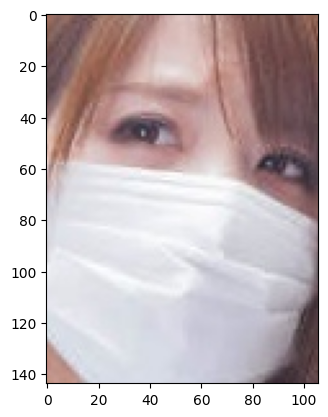

In [13]:
img1 = mpimg.imread('/content/data/with_mask/with_mask_193.jpg')
imgplot = plt.imshow(img1)
plt.show()

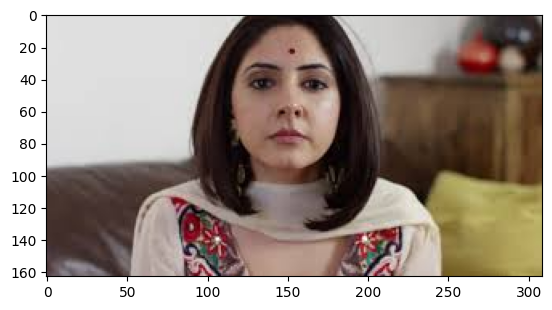

In [14]:
img1 = mpimg.imread('/content/data/without_mask/without_mask_1497.jpg')
imgplot = plt.imshow(img1)
plt.show()

# Image Processing part
   * Things to be done :
      * Resizing images.
      * Converting images to numpy arrays.

In [15]:
path_with_mask = '/content/data/with_mask/'
new_data = []
for img_file in files_with_mask:
  image = Image.open(path_with_mask + img_file)
  image = image.resize((130,130))
  image = image.convert('RGB')
  image = np.array(image)
  new_data.append(image)

path_without_mask = '/content/data/without_mask/'

for img_file in files_without_mask:
  image = Image.open(path_without_mask + img_file)
  image = image.resize((130,130))
  image = image.convert('RGB')
  image = np.array(image)
  new_data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
print(type(new_data) ,len(new_data))

<class 'list'> 7553


array([[[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 250, 252],
        [249, 250, 252],
        [249, 250, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[237, 229, 218],
        [237, 229, 218],
        [234, 226, 215],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 229, 217],
        [235, 227, 216],
        [234, 224, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[236, 230, 218],
        [235, 227, 216],
        [233, 224, 214],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
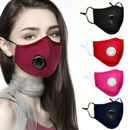

In [17]:
new_data[0]

In [18]:
print(type(new_data[0]), new_data[0].shape)

<class 'numpy.ndarray'> (130, 130, 3)


## Convering list of images and list of labels to the numpy array

In [19]:
X = np.array(new_data)
y = np.array(final_labels)

print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7553, 130, 130, 3) (7553,)


## Train and Test Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
print(X_train.shape, X_test.shape)

(6042, 130, 130, 3) (1511, 130, 130, 3)


## Scaling images

In [22]:
scaled_X_train = X_train/255
scaled_X_test = X_test/255

print(scaled_X_test[0])

[[[0.50588235 0.27058824 0.1372549 ]
  [0.52156863 0.28627451 0.15294118]
  [0.54509804 0.30980392 0.17647059]
  ...
  [0.65490196 0.70980392 0.50196078]
  [0.65490196 0.70980392 0.50980392]
  [0.65490196 0.70980392 0.50980392]]

 [[0.55294118 0.32941176 0.19607843]
  [0.56862745 0.34509804 0.21176471]
  [0.58823529 0.36470588 0.23137255]
  ...
  [0.65490196 0.70980392 0.50196078]
  [0.65490196 0.70980392 0.50980392]
  [0.65490196 0.70980392 0.51372549]]

 [[0.60784314 0.39607843 0.26666667]
  [0.62352941 0.41176471 0.28235294]
  [0.63921569 0.42745098 0.29803922]
  ...
  [0.65882353 0.70980392 0.50196078]
  [0.65490196 0.70980392 0.51372549]
  [0.65098039 0.70980392 0.51764706]]

 ...

 [[0.5254902  0.61960784 0.32156863]
  [0.52941176 0.62352941 0.3254902 ]
  [0.53333333 0.62745098 0.32941176]
  ...
  [0.65882353 0.71764706 0.5254902 ]
  [0.64705882 0.71764706 0.5254902 ]
  [0.63921569 0.71764706 0.5254902 ]]

 [[0.5254902  0.61960784 0.32156863]
  [0.52941176 0.62352941 0.3254902 ]


# Building the Model

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
count_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (130, 130, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(count_of_classes, activation='sigmoid'))

In [25]:
# now compiling the nueral network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Training the Nural Network

In [26]:
his = model.fit(scaled_X_train, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 27ms/step - loss: 0.5396 - accuracy: 0.7309 - val_loss: 0.4183 - val_accuracy: 0.8364
Epoch 2/5
170/170 [==============================] - 4s 23ms/step - loss: 0.3252 - accuracy: 0.8770 - val_loss: 0.3210 - val_accuracy: 0.8760
Epoch 3/5
170/170 [==============================] - 4s 23ms/step - loss: 0.2595 - accuracy: 0.8990 - val_loss: 0.2394 - val_accuracy: 0.9041
Epoch 4/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2138 - accuracy: 0.9187 - val_loss: 0.2593 - val_accuracy: 0.9157
Epoch 5/5
170/170 [==============================] - 4s 22ms/step - loss: 0.1804 - accuracy: 0.9338 - val_loss: 0.2186 - val_accuracy: 0.9223


## Evaluting the Model


In [28]:
loss, accuracy = model.evaluate(scaled_X_test, y_test)
print('Test Accuracy : ', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2029 - accuracy: 0.9232
Test Accuracy :  0.9232296347618103


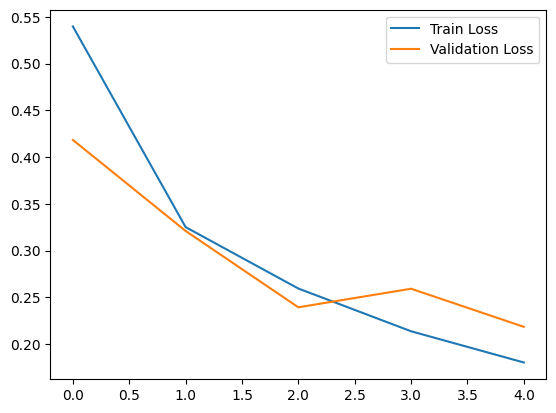

In [30]:
h = his
plt.plot(h.history['loss'], label = 'Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

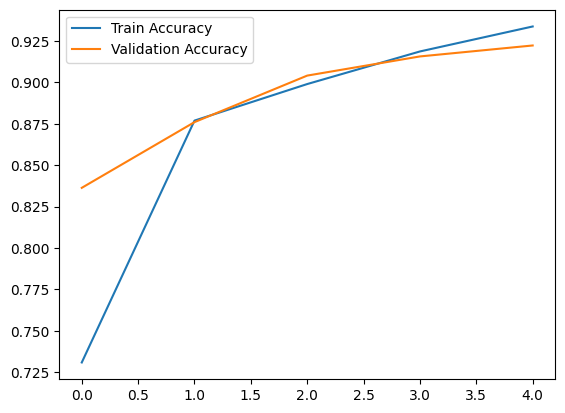

In [31]:
plt.plot(h.history['accuracy'], label = 'Train Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## System for Prediction

Provide the image path for Prediction : /content/test1.jpg


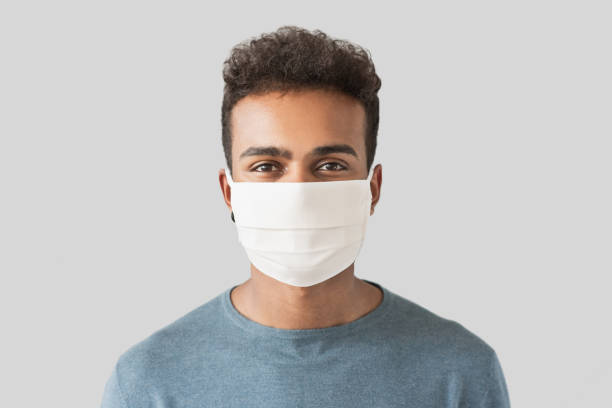

1/1 [==============================] - 0s 19ms/step
[[0.46064374 0.49696246]]
1
The Person is Wearing a Mask


In [35]:
path_of_input_image = input('Provide the image path for Prediction : ')

in_image = cv2.imread(path_of_input_image)

cv2_imshow(in_image)

in_image_resize = cv2.resize(in_image, (130,130))

scaled_in_image = in_image_resize/255

in_image_reshape = np.reshape(scaled_in_image, [1, 130, 130, 3])

in_pred = model.predict(in_image_reshape)

print(in_pred)

in_pred_label = np.argmax(in_pred) # done to convert the predicted probability values to the given label values

print(in_pred_label)

if in_pred_label == 1:
  print("The Person is Wearing a Mask")
else :
  print("The person in not Wearing a Mask")